In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [5]:
base_df = pd.read_csv("../data/output_files/final_base_df.csv")

In [6]:
varient_list = list(set(base_df["varient"]))

# Chopped analysis

In [41]:
varient_chopped_counter = {}
for varient in varient_list:
    chopped_counter = len(base_df[(base_df["varient"] == varient )&(base_df["Chopped"] == True)])
    not_chopped_counter = len(base_df[(base_df["varient"] == varient) & (base_df["Chopped"] == False)])
    varient_chopped_counter[varient] = {"chopped":chopped_counter, "not chopped":not_chopped_counter}

print(varient_chopped_counter)

In [45]:
cols = ["varient", "count", "Chopped?"]
rows = []
for var in varient_chopped_counter:
    rows.append([var, True, varient_chopped_counter[var]["chopped"]])
    rows.append([var, True, varient_chopped_counter[var]["not chopped"]])
chopped_counter_df = pd.DataFrame(rows, columns=cols)

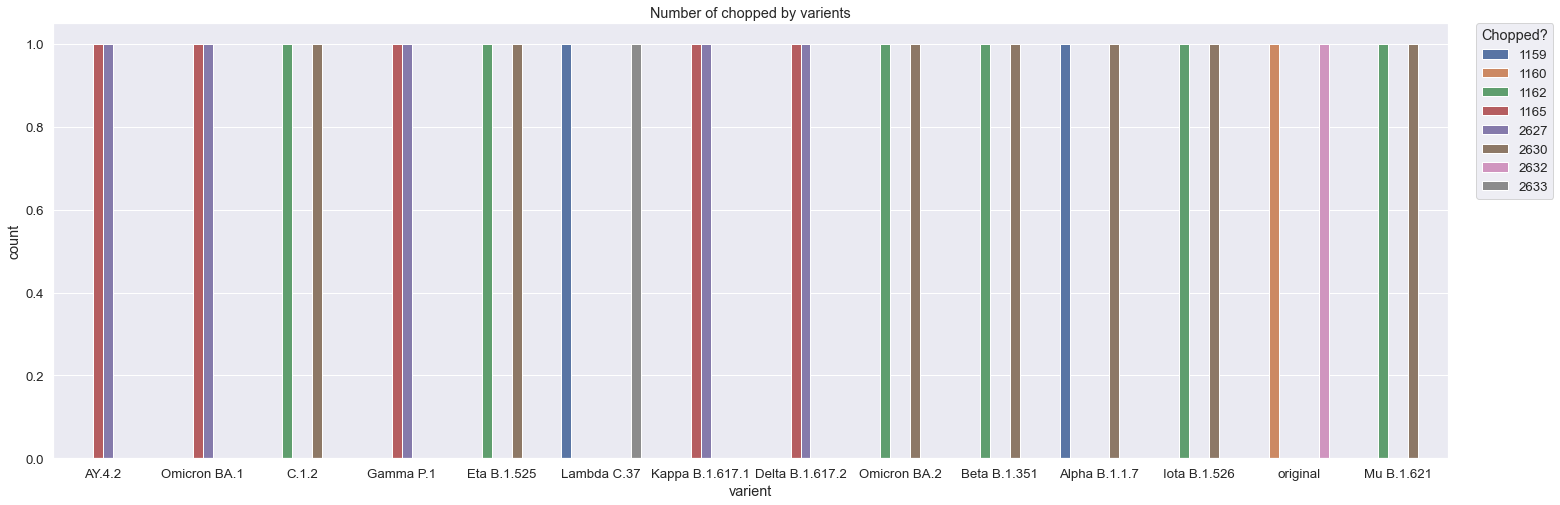

In [47]:
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(25,8)})
sns.set(font_scale = 1.2)
ax = sns.barplot(x="varient", y="count", hue="Chopped?", data=chopped_counter_df)
ax.set_title('Number of chopped by varients')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title="Chopped?")
plt.savefig("plots/chopped-varient.png", dpi=500, bbox_inches='tight')
